# Chi square test of independence

Where do we start from? The beginning!

## Contingency table
A contingency table aka a two-way frequency table is a tabular mechanism with at least two rows and columns used in statistics to present categorical columns in terms of frequency counts. They provide a basic picture of the interrelation between betweem two variables and can help find interractions between them.

The interest is in assessing whether one factor depends or is contingent on another or that a set of factors influence another set of factors.

#### Uses of contigency tables
- Assessment of joint and marginal probabilities.
- Computation of expected frequencies.
- Testing for independence of the two characterstics.

In chi_square test of independence, the expected frequency for each cell is calculated and the assumption suggests that no cell should have expected frequency less than 5 but if any expected counts are less than 5, then some other test should be used such as the Fisher's exact test.

The expected frequency value is given as:

$$E_{ij} = \frac{(sum \ of \ row_i) * (sum \ of \ column_i)}{sample \ size}$$

One of the major benefits of computing the expected frequencies is the ability to test whether the two variables being examined are actually independent as they have been assumed throughout. This is done by computing, for each cell, the expected frequency $E_{ij}$ and comparing it with the observed frequency $O_{ij}$

## Chi-square tests
Chi-square tests can be conducted on contigenecy tables to test whether or not a relationship exists between variables. The chi-square test statistic test for contigency is given as:

$$x^2 = \frac{(O_1 - E_1)^2}{E_1} + \frac{(O_2 - E_2)^2}{E_2} + \ ... \ + \frac{(O_k - E_k)^2}{E_k}$$

Where the sum is taken over all cells in the contingency, k = rc (r=rows, c=columns)

When the Chi-square statistic is small it means that there is little relationship betweem the categorical variables. A large chi-square value means that there is a definite relationship between the two variables.

## Chi-sqaure test of independence
How do we test the independence of two categorical variables? It is done using the chi-square test of independence. The interest is to research if two categorical variables are related or associated in the population from which the sample is drawn.

Therefore, until we have evidence to suggest that they are dependent we must assume that they are independent. This is the concept behind the hypothesis for the chi-square test of independence:

$H_0:$ In the population, the two categorical variables are independent (i.e., there is no relationship between the categorical variables)

$H_1:$ In the population, two categorical variables are dependent (i.e., there is a relationship between the two categorical columns)

We make our final decision by comparing the value of the test statistic to a critical value. The critical value for our chi-square test is:

$\chi^2_{\alpha, (r-1)(c-1)}$

For example, let's say that the chi-square test statistic $x_2$ = 22.152,

with degrees of freedom equal to $\chi^2_{0.05, (2-1)(3-1)} = \chi^2{0.05, 2} = 5.99$ computed from the table.

Where:

$\alpha$ = siginificance level

r = number of rows = 2

c = number of columns = 3

Now since $\chi^2 = 22.152 > \chi^2_{0.05, 2} = 5.99$, we reject the null hypothesis which says that the categorical values are independent, and we can say that we are 95% confident that the categorical values in question are actually dependent.

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import chi2_contingency

'''
where chi2_contingency returns the:
- chi2 test statistic
- p-value
- degree of freedom
- expected frequencies
'''

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


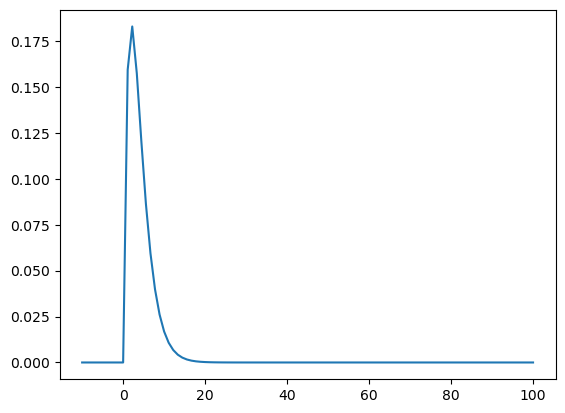

In [3]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100) #linspace generates an array of evenly spaced numbers over a specified interval
y = chi2.pdf(x, df=4)
plt.plot(x,y)

In [4]:
data = pd.read_csv('Data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
data.shape

(48842, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Question: is there a relationship between occupation and gender? (or does the preference of occupation depend on the gender)

In [6]:
data['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [8]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### Using the Chi2 test 

Let's make a bold claim that gender and occupation are dependent.

**Step 1: state the hypothesis**

$H_0:$ They are independent

$H_1:$ They are dependent

**Step 2:** 

- Collect the sample of size n
- Compute the sample frequencies

**Step 3: compute the $\chi^2$ test statistic**

We need to check if the difference in the observed and expected frequencies is too extreme to reject the null hypothesis.

- Have a look at the observed frequencies (in the sample
- Compute the expected frequencies (under the null hypothesis assumption)

$$Expected \ value = \frac{row \ total * col \ total}{grand \ total}$$

Then, the test statistic can be computed using the below mentioned formula:

$$\chi^2 = \Sigma \frac{(o-e)^2}{e} $$

**Step 4: decide $\alpha$ and $df = (rows - 1)(cols - 1)$**

**Step 5: apply decision rule**

- Chi square test

$$if \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject \ H_0$$

- p-value test

$$p value = (1.0 - cdf(test \ statistic))$$

Now, 

$$if (p \ value < \alpha) \Rightarrow Accept \ H_1 or Reject \ H_0$$

In [20]:
# Step 2: looking at the frequency distribution
pd.crosstab(data.occupation, data.gender, margins = True)

gender,Female,Male,All
occupation,,,
?,1273,1536,2809
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923


In [21]:
# this is known as the observed frequencies

observed = pd.crosstab(data.occupation, data.gender)
observed

gender,Female,Male
occupation,,
?,1273,1536
Adm-clerical,3769,1842
Armed-Forces,0,15
Craft-repair,323,5789
Exec-managerial,1748,4338
Farming-fishing,95,1395
Handlers-cleaners,254,1818
Machine-op-inspct,804,2218
Other-service,2698,2225


In [22]:
#to return chi2 parameters

chi2_contingency(observed)

(8789.50801388705,
 0.0,
 14,
 array([[ 931.233938  , 1877.766062  ],
        [1860.14725032, 3750.85274968],
        [   4.97276934,   10.02723066],
        [2026.2377462 , 4085.7622538 ],
        [2017.61827935, 4068.38172065],
        [ 493.96175423,  996.03824577],
        [ 686.90520454, 1385.09479546],
        [1001.8472626 , 2020.1527374 ],
        [1632.06289669, 3290.93710331],
        [  80.22734532,  161.77265468],
        [2046.12882355, 4125.87117645],
        [ 325.88215061,  657.11784939],
        [1824.67482904, 3679.32517096],
        [ 479.37496417,  966.62503583],
        [ 780.72478604, 1574.27521396]]))

In [23]:
#the above result is a 1 by 4 shaped result
#so we use [] to select each of the results and assign it to a variable name

chi2_test_stat = chi2_contingency(observed)[0]
p_val = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [25]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1-alpha, df)

chi2_critical

21.064144212997064

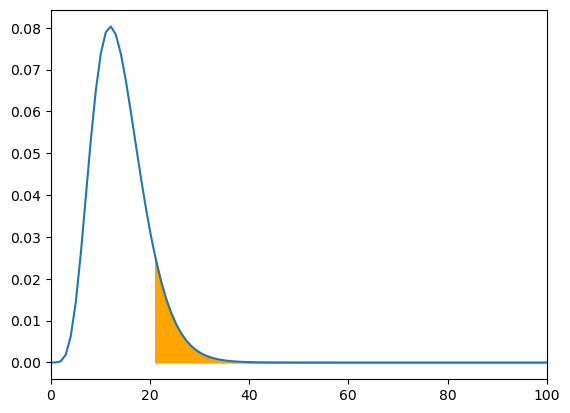

In [27]:
#plotting the chi2 distribution to visualize

#defining the x minimum and x maximum
x_min = 0
x_max = 100

#plotting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#setting the chi2 critical value
chi2_critical_right = chi2_critical

#shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)

plt.fill_between(x1, y1, color='orange')

In [28]:
#applying decision rule

if (chi2_test_stat > chi2_critical):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


In [29]:
if (p_val < alpha):
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')

Reject null hypothesis


By rejecting the null hypothesis, it means that there is indeed a relationship between the gender and the occupation or in other words, the preference of occupation depends on the gender.